<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,31.783054,89.332242,0.074026,131.189322,131.131366,0.057956
1,0.0,1.0,36.971735,40.855546,0.391811,88.219093,87.844664,0.374428
2,0.0,2.0,87.154125,70.314337,-0.374186,167.094276,167.541418,-0.447142
3,0.0,3.0,49.252260,87.965481,0.697101,147.914841,147.252157,0.662685
4,0.0,4.0,45.349418,77.303192,-0.177102,132.475508,132.681983,-0.206475
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,39.861552,98.427700,-0.050110,148.239143,148.208615,0.030528
249996,999.0,246.0,72.082506,26.033365,0.116285,108.232156,108.102778,0.129378
249997,999.0,247.0,25.563387,68.898136,0.351101,104.812625,104.392857,0.419768
249998,999.0,248.0,70.302517,61.236880,0.355277,141.894673,141.501344,0.393330


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,31.783054,89.332242,0.074026,131.189322,131.131366,0.057956
1,0.0,1.0,36.971735,40.855546,0.391811,88.219093,87.844664,0.374428
2,0.0,2.0,87.154125,70.314337,-0.374186,167.094276,167.541418,-0.447142
3,0.0,3.0,49.252260,87.965481,0.697101,147.914841,147.252157,0.662685
4,0.0,4.0,45.349418,77.303192,-0.177102,132.475508,132.681983,-0.206475
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,39.861552,98.427700,-0.050110,148.239143,148.208615,0.030528
249996,999.0,246.0,72.082506,26.033365,0.116285,108.232156,108.102778,0.129378
249997,999.0,247.0,25.563387,68.898136,0.351101,104.812625,104.392857,0.419768
249998,999.0,248.0,70.302517,61.236880,0.355277,141.894673,141.501344,0.393330


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    31.783054  89.332242  0.074026  131.189322  131.131366  0.057956
      1.0    36.971735  40.855546  0.391811   88.219093   87.844664  0.374428
      2.0    87.154125  70.314337 -0.374186  167.094276  167.541418 -0.447142
      3.0    49.252260  87.965481  0.697101  147.914841  147.252157  0.662685
      4.0    45.349418  77.303192 -0.177102  132.475508  132.681983 -0.206475
...                ...        ...       ...         ...         ...       ...
999.0 245.0  39.861552  98.427700 -0.050110  148.239143  148.208615  0.030528
      246.0  72.082506  26.033365  0.116285  108.232156  108.102778  0.129378
      247.0  25.563387  68.898136  0.351101  104.812625  104.392857  0.419768
      248.0  70.302517  61.236880  0.355277  141.894673  141.501344  0.393330
      249.0  85.431824  32.917089 -0.285736  128.063176  128.338716 -0.275540

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    31.783054  89.332242  0.074026  131.189322  131.131366  0.057956
      1.0    36.971735  40.855546  0.391811   88.219093   87.844664  0.374428
      2.0    87.154125  70.314337 -0.374186  167.094276  167.541418 -0.447142
      3.0    49.252260  87.965481  0.697101  147.914841  147.252157  0.662685
      4.0    45.349418  77.303192 -0.177102  132.475508  132.681983 -0.206475
...                ...        ...       ...         ...         ...       ...
999.0 245.0  39.861552  98.427700 -0.050110  148.239143  148.208615  0.030528
      246.0  72.082506  26.033365  0.116285  108.232156  108.102778  0.129378
      247.0  25.563387  68.898136  0.351101  104.812625  104.392857  0.419768
      248.0  70.302517  61.236880  0.355277  141.894673  141.501344  0.393330
      249.0  85.431824  32.917089 -0.285736  128.063176  128.338716 -0.275540

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,31.783054,89.332242,0.074026,131.189322,131.131366,0.057956
1,0.0,1.0,36.971735,40.855546,0.391811,88.219093,87.844664,0.374428
2,0.0,2.0,87.154125,70.314337,-0.374186,167.094276,167.541418,-0.447142
3,0.0,3.0,49.252260,87.965481,0.697101,147.914841,147.252157,0.662685
4,0.0,4.0,45.349418,77.303192,-0.177102,132.475508,132.681983,-0.206475
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,39.861552,98.427700,-0.050110,148.239143,148.208615,0.030528
249996,999.0,246.0,72.082506,26.033365,0.116285,108.232156,108.102778,0.129378
249997,999.0,247.0,25.563387,68.898136,0.351101,104.812625,104.392857,0.419768
249998,999.0,248.0,70.302517,61.236880,0.355277,141.894673,141.501344,0.393330


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    31.783054  89.332242  0.074026  131.189322  131.131366  0.057956
      1.0    36.971735  40.855546  0.391811   88.219093   87.844664  0.374428
      2.0    87.154125  70.314337 -0.374186  167.094276  167.541418 -0.447142
      3.0    49.252260  87.965481  0.697101  147.914841  147.252157  0.662685
      4.0    45.349418  77.303192 -0.177102  132.475508  132.681983 -0.206475
...                ...        ...       ...         ...         ...       ...
999.0 245.0  39.861552  98.427700 -0.050110  148.239143  148.208615  0.030528
      246.0  72.082506  26.033365  0.116285  108.232156  108.102778  0.129378
      247.0  25.563387  68.898136  0.351101  104.812625  104.392857  0.419768
      248.0  70.302517  61.236880  0.355277  141.894673  141.501344  0.393330
      249.0  85.431824  32.917089 -0.285736  128.063176  128.338716 -0.275540

[250000 rows x 6 columns]

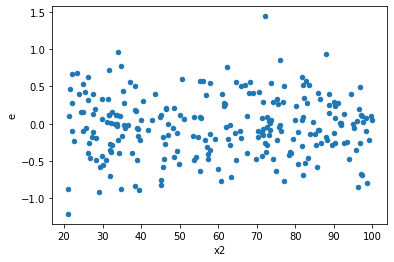

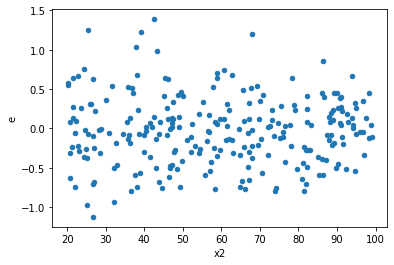

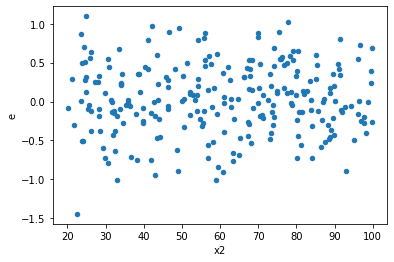

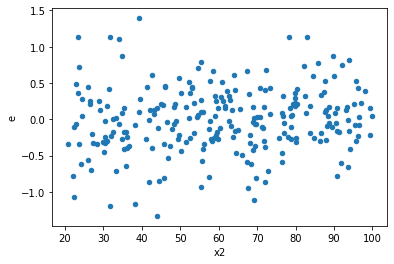

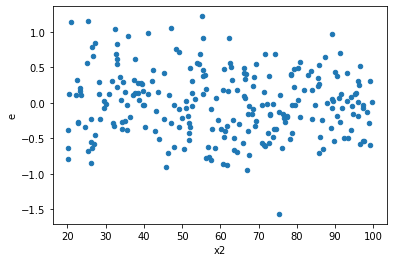

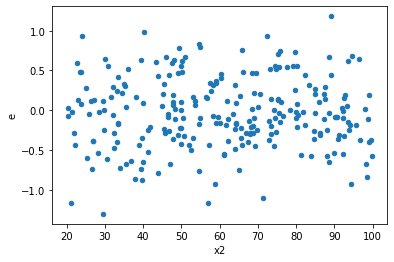

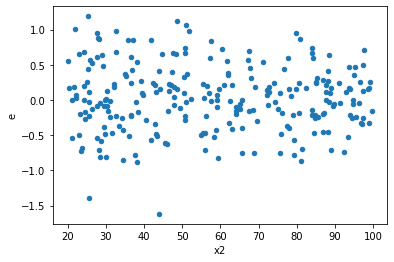

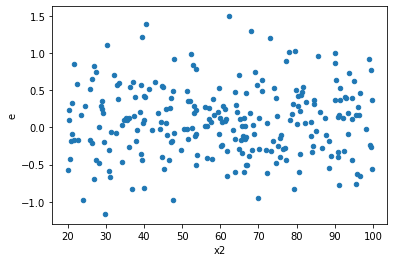

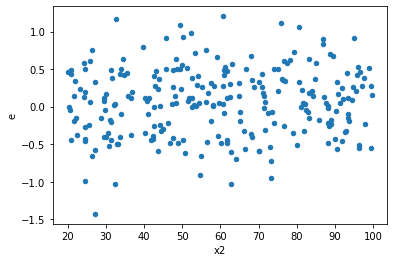

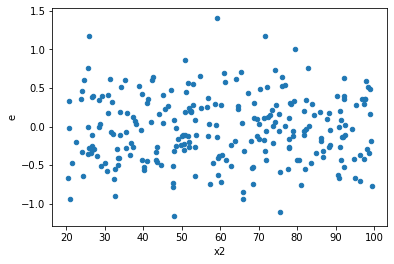

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
6.0,98.0,98.0,16.43107450527645,17.516455954038378,0.1676640255640454,0.17873934646977938,1.0660566324139902,0.7521662544281724,0.6239168727859138,0.3760831272140862,Reject005=1 : Homoscedasticity
17.0,98.0,98.0,23.41857102308073,23.469674648913,0.23896501043959928,0.23948647600931633,1.0021821837797833,0.9914133314140865,0.5042933342929568,0.49570666570704325,Reject005=1 : Homoscedasticity
30.0,98.0,98.0,19.07482193164887,20.958695833991555,0.19464104011886602,0.21386424320399547,1.0987623323086948,0.6419919187112377,0.6790040406443811,0.32099595935561887,Reject005=1 : Homoscedasticity
78.0,98.0,98.0,20.687399582455583,21.300972363715356,0.21109591410668962,0.21735686085423833,1.0296592512178344,0.8852638175169387,0.5573680912415306,0.44263190875846936,Reject005=1 : Homoscedasticity
106.0,98.0,98.0,19.524428090102226,20.082205384282965,0.19922885806226762,0.2049204631049282,1.0285681758055438,0.8893983354678285,0.5553008322660857,0.44469916773391427,Reject005=1 : Homoscedasticity
125.0,98.0,98.0,17.36177887055365,18.74608709922145,0.17716100888320052,0.19128660305328013,1.0797330872020061,0.7049102299682342,0.6475448850158829,0.3524551149841171,Reject005=1 : Homoscedasticity
184.0,98.0,98.0,18.51005492746197,19.839423570086016,0.18887811150471398,0.20244309765393895,1.071818730297324,0.732056996960442,0.633971501519779,0.366028498480221,Reject005=1 : Homoscedasticity
187.0,98.0,98.0,20.42877595197576,21.240003374464855,0.2084568974691404,0.21673472831086588,1.0397100357063067,0.8475422721465349,0.5762288639267326,0.42377113607326744,Reject005=1 : Homoscedasticity
190.0,98.0,98.0,17.572769621891194,17.662254419224592,0.1793139757335836,0.18022708591045503,1.0050922421029138,0.9799933168220294,0.5100033415889853,0.4899966584110147,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,24.28720067962102,18.914347369530397,0.2478285783634798,0.19300354458704486,0.7787784034493982,0.2176398926283477,Reject005=1 : Homoscedasticity
1.0,98.0,98.0,23.715982684744258,15.347709605438464,0.24199982331371692,0.15660928168814758,0.6471462645868417,0.03233931502706987,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,22.600329850235173,18.33897798526584,0.23061561071668543,0.18713242842108,0.8114473596974962,0.3027232755111827,Reject005=1 : Homoscedasticity
3.0,98.0,98.0,26.88604780802012,18.153862199316215,0.2743474266124502,0.1852434918297573,0.6752149787482306,0.053264282860214215,Reject005=1 : Homoscedasticity
4.0,98.0,98.0,20.53020837288284,15.617064851924319,0.20949192217227386,0.15935780461147264,0.7606871088825379,0.1775362588137722,Reject005=1 : Homoscedasticity
5.0,98.0,98.0,20.082809779529917,15.792094823611324,0.2049266304033665,0.1611438247307278,0.7863488723429503,0.2359208900213847,Reject005=1 : Homoscedasticity
6.0,98.0,98.0,16.43107450527645,17.516455954038378,0.1676640255640454,0.17873934646977938,1.0660566324139902,0.7521662544281724,Reject005=1 : Homoscedasticity
7.0,98.0,98.0,26.59877217827202,17.773952709553054,0.2714160426354288,0.18136686438319444,0.6682245552699694,0.04729461365358078,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,25.75741668711724,18.982582902165355,0.26283078252160447,0.19369982553229953,0.736975416935334,0.1326028864220918,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      577
Reject005=0 : Heteroscedasticity    423
Name: Result_test, dtype: int64